In [2]:
from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import networkx as nx

In [3]:
%matplotlib inline

In [4]:
flynumbers = list(range(1389,1402))
flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
l = [fly.open_signals() for fly in flylist]

In [7]:
decon_fly = flb.NetFly(1530,rootpath='/media/imager/FlyDataD/FlyDB/')
decon_fly.open_signals()

abf_sp = decon_fly.abf_times[1] #abf spike period
ca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(decon_fly.abf_led_pulse)>1.0)[0]
start = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)

#make a time array for the recording epoch
ep_times = np.array(decon_fly.abf_times[start:stop])
ep_times -= ep_times[0]

#load this into memory since I will use it quite a bit
i1_spike_sig = np.array(decon_fly.abf_electrode[start:stop])
i1_ca = decon_fly.ca_camera_left_model_fits['i1']

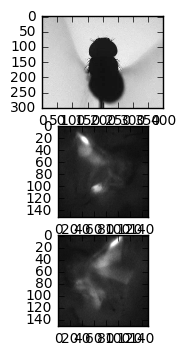

In [196]:
fly = flylist[-9]
snum =4
idx = fly.block_data['common','idx','cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)
yrng = slice(100,400)
xrng = slice(50,450)
ax1.imshow(fly.kine_cam_1[idx[125]].T[yrng,xrng],cmap = plt.cm.gray)
ax2.imshow(fly.ca_cam_right[idx[125]][:,::-1][:,:150]**1.2,vmin = 0,vmax = 450,cmap = plt.cm.gray)
ax3.imshow(fly.ca_cam_left[idx[125]][:,::-1][:,50:]**1.2,vmin = 0,vmax = 450,cmap = plt.cm.gray)

make_poster.py:96: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  state_mtrx = np.vstack([fly.spikestates[key][fly.data_mask] for key in sorted_keys])


[ 1.  1.  1.  1.]
[ 1.  1.  1.  1.]
(13, 100, 100)
(13, 100, 100)
(13, 100, 100)


make_poster.py:395: RuntimeWarning: divide by zero encountered in log
  ax_lbls_left.text(3*i+1,row+1,{0:'',1:' %s%-5s'%(sorted_keys[i][0][0],


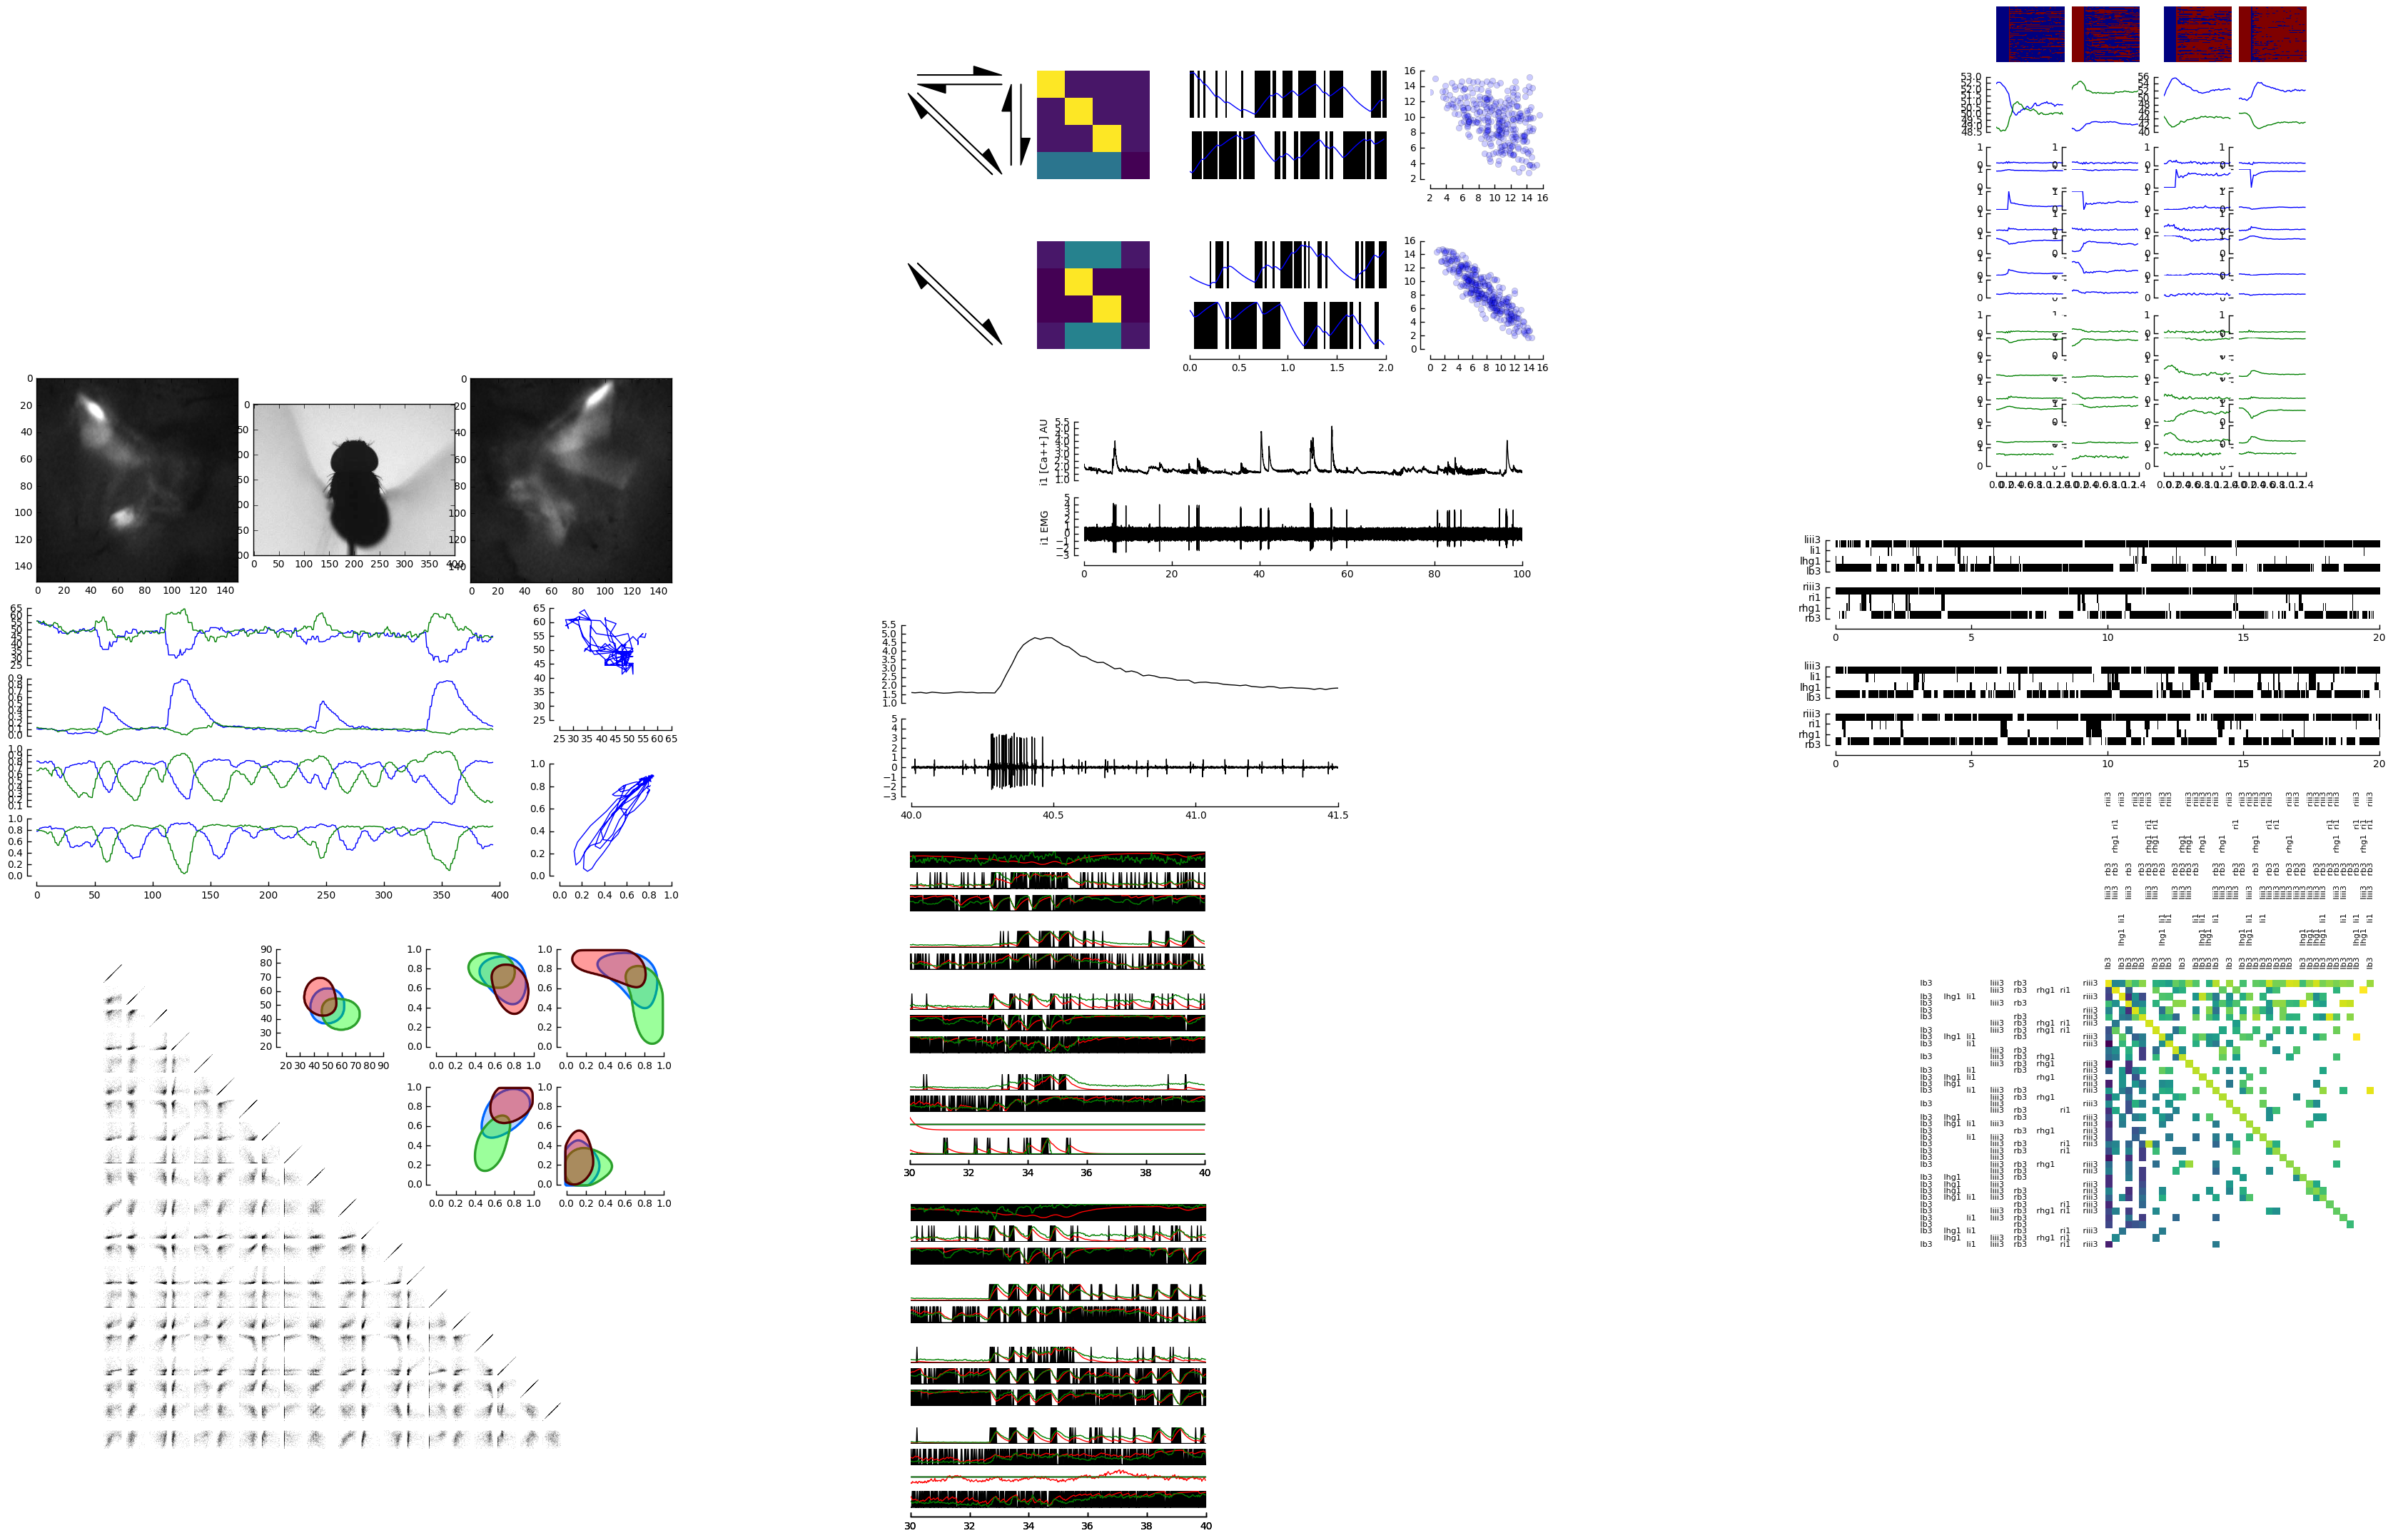

In [198]:
run -i make_poster.py

In [199]:
print 'here'

here


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:96: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


[ 1.  1.  1.  1.]
[ 1.  1.  1.  1.]
(13, 100, 100)
(13, 100, 100)
(13, 100, 100)


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:389: RuntimeWarning: divide by zero encountered in log


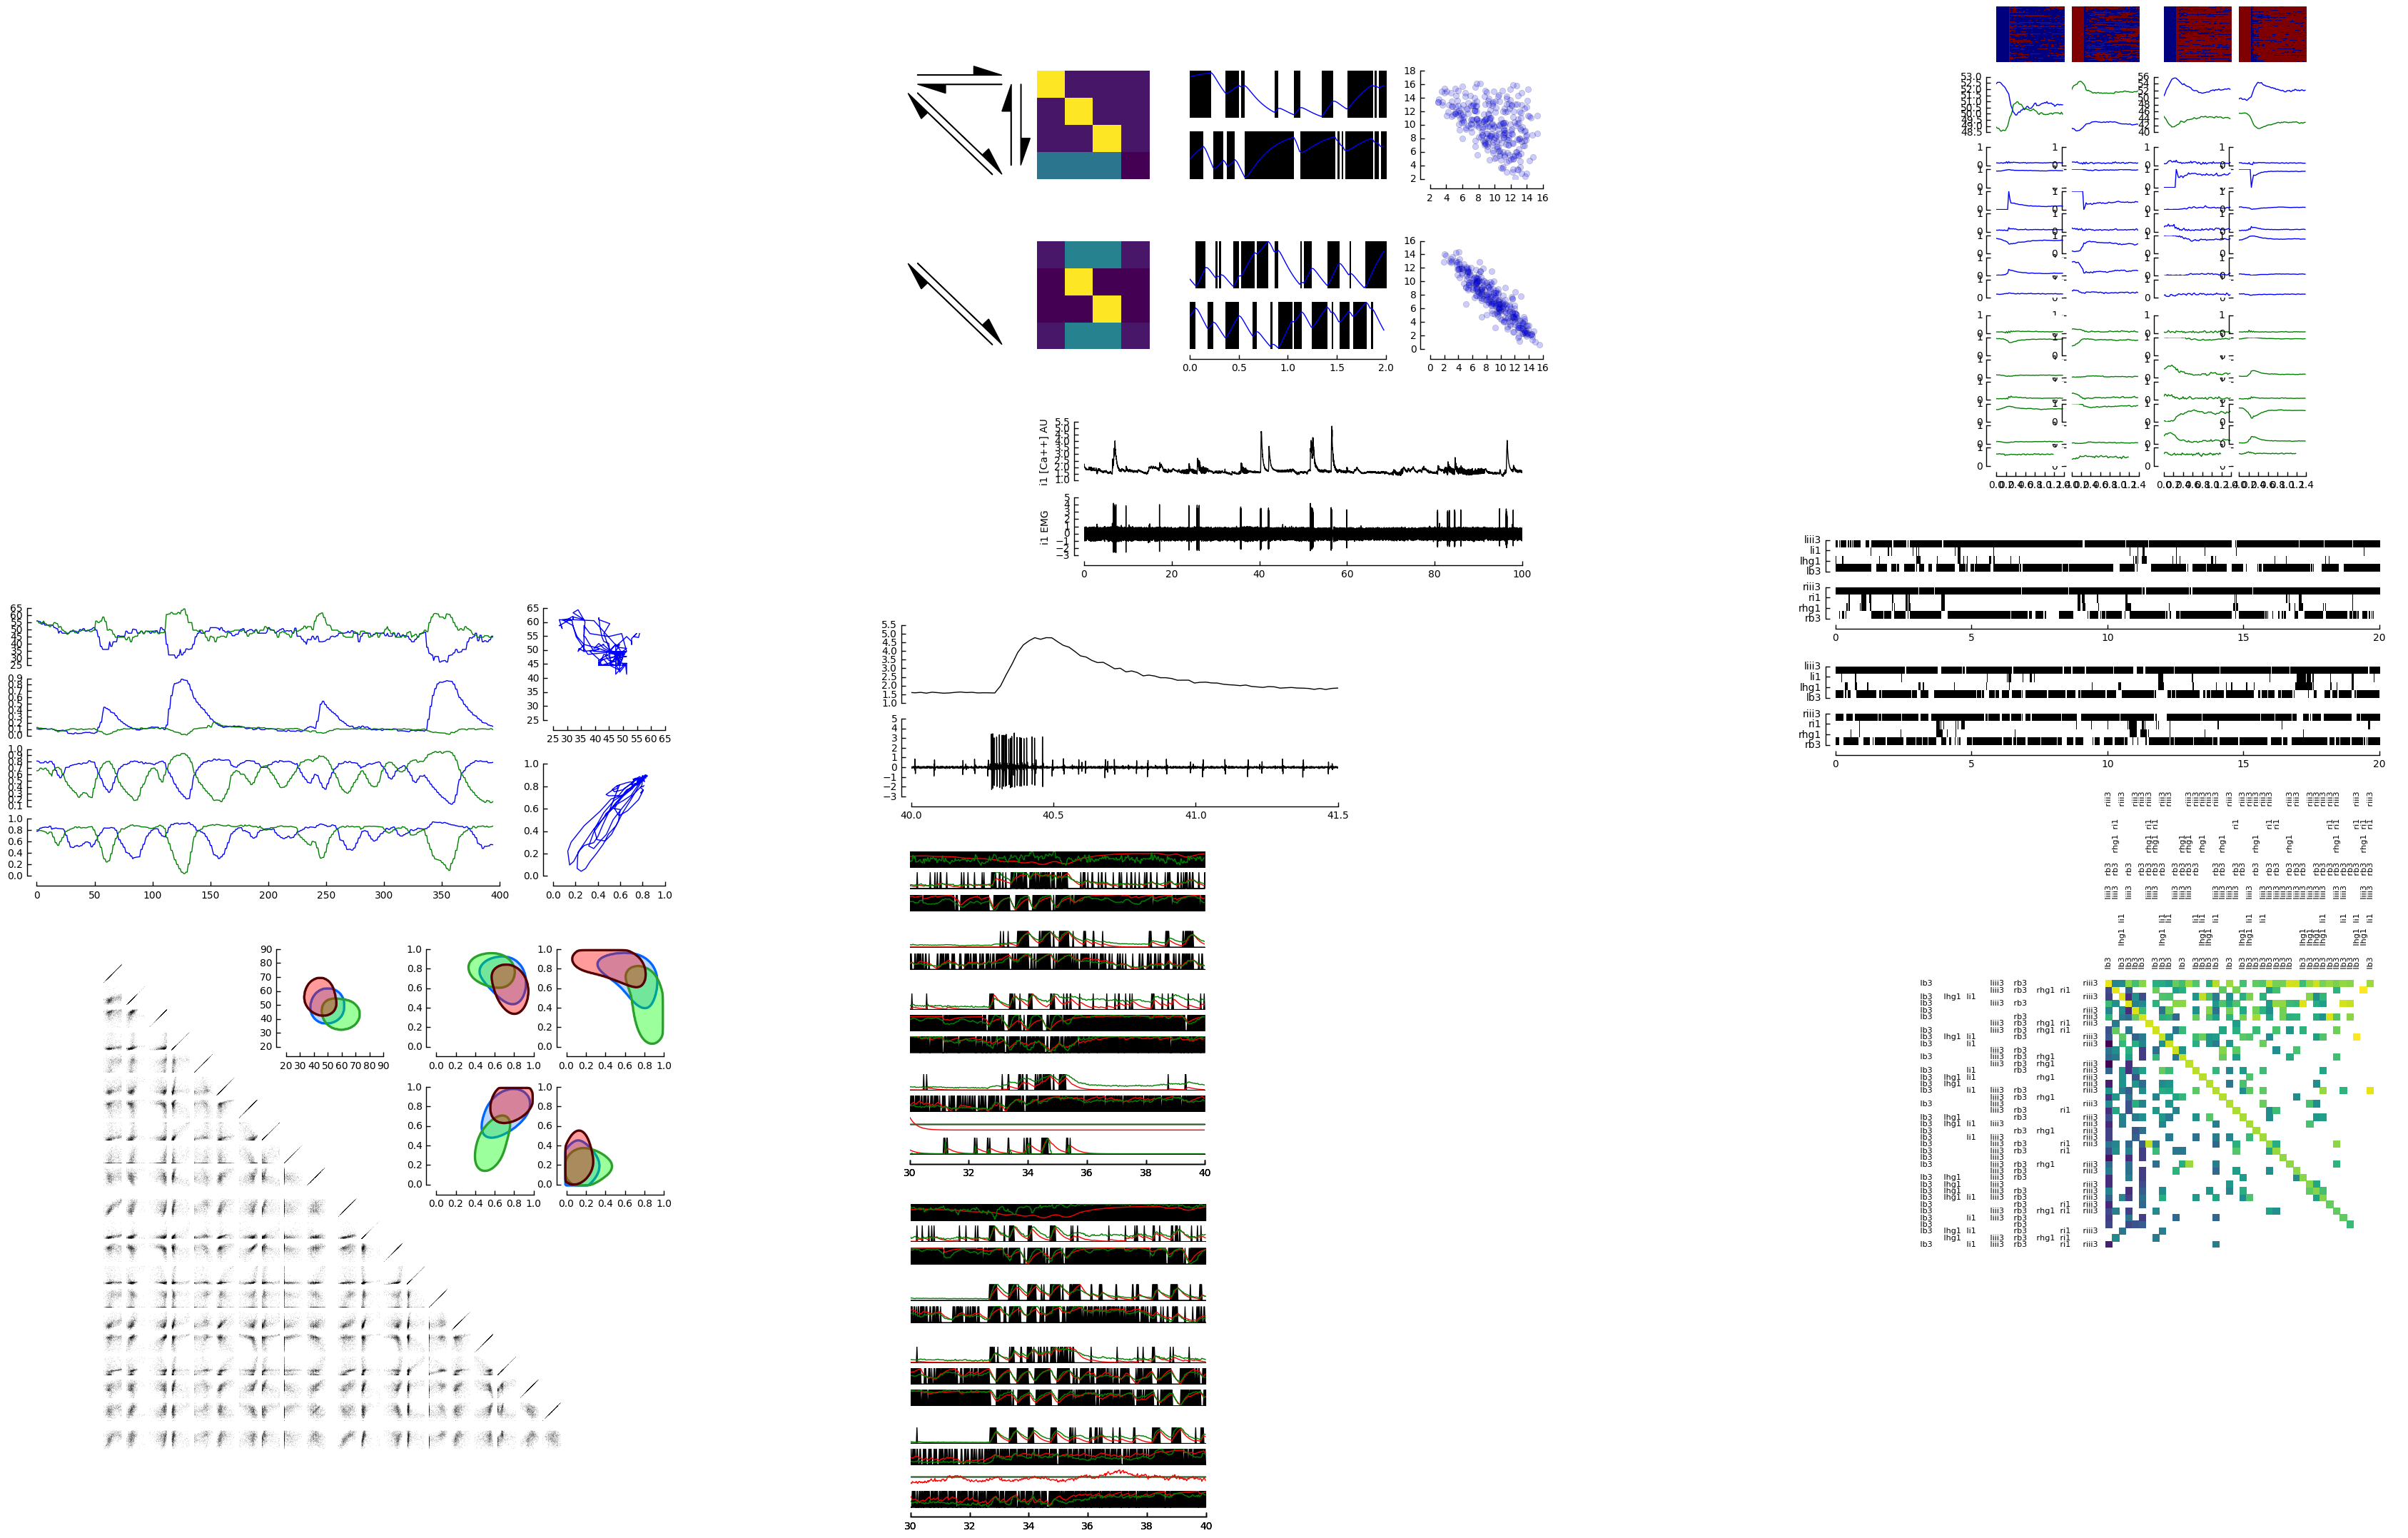

In [160]:
reload(lpf)

layout = fifi.FigureLayout('poster_layout.svg',make_mplfigures = True)


#######################################
#  trigger pannel                     #
#######################################

sorted_keys = sorted(fly.spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

for cull in cull_list:
    sorted_keys.remove(cull)
#[sorted_keys.remove(cull) for cull in cull_list]

flydict = {}
for fly in flylist:
    flydict[fly.flynum] = fly
    
stim_conditions = [('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'),
                  ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'),
                  ('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0')]

#stim_conditions = [('common', 'idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0')]
state_mtrx_dict = {}
for fly in flylist:
    state_mtrx_dict[fly.flynum] = {}
    idxs = list()
    for stim_condition in stim_conditions:
        idxs.extend(fly.block_data[stim_condition])
    for muscle_key in sorted_keys:
        state_mtrx_dict[fly.flynum][muscle_key] = [(fly.spikestates[muscle_key][idx],idx) for idx in idxs]
        

ts = 0.02
pretrig = 10 #samples
posttrig = 50 #samples

trig_panel_data = dict(ts = ts,
                       pretrig = pretrig,
                       posttrig = posttrig,
                       state_mtrx_dict = state_mtrx_dict,
                       sorted_keys = sorted_keys,
                       flydict= flydict)
def frmt(ax):
    ax.set_ybound(0,1)
    ax.set_yticks([0,1])
    
ax_group = layout.axes_groups['none']['i1_on']
[frmt(ax) for ax in ax_group['left'].values()]
[frmt(ax) for ax in ax_group['right'].values()]
lpf.plot_trig_panel(ax_group,('left','i1'),direction = 'off_on',**trig_panel_data)

ax_group = layout.axes_groups['none']['i1_off']
[frmt(ax) for ax in ax_group['left'].values()]
[frmt(ax) for ax in ax_group['right'].values()]
lpf.plot_trig_panel(ax_group,('left','i1'),direction = 'on_off',**trig_panel_data)

ax_group = layout.axes_groups['none']['iii3_on']
[frmt(ax) for ax in ax_group['left'].values()]
[frmt(ax) for ax in ax_group['right'].values()]
lpf.plot_trig_panel(ax_group,('left','b3'),direction = 'off_on',**trig_panel_data)

ax_group = layout.axes_groups['none']['iii3_off']
[frmt(ax) for ax in ax_group['left'].values()]
[frmt(ax) for ax in ax_group['right'].values()]
lpf.plot_trig_panel(ax_group,('left','b3'),direction = 'on_off',**trig_panel_data)


#######################################
#  Setup for simplified analysis      #
#######################################


sorted_keys = sorted(fly.spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii1'),('right', 'iii1'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'hg2'),('right', 'hg2'),
            ('left', 'hg3'),('right', 'hg3'),
            ('left', 'hg4'),('right', 'hg4'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]
for cull in cull_list:
    sorted_keys.remove(cull)

state_mtrxs = list()
state_mtrx = np.vstack([fly.spikestates[key][fly.data_mask] for key in sorted_keys])

##########################
#  Markov intro          #
##########################

TAU_ON_S = 0.0155905
TAU_OFF_S = 0.23594343
times = np.arange(0,90/0.02)*0.02
slow_kernel = lpf.make_single_kernel(times,TAU_ON_S,TAU_OFF_S)

state_table= [[1,1],
              [0,1],
              [1,0],
              [0,0]]

tmtrx_coup = [[0.12,    0.38,    0.38,     0.12],
              [0.08,    0.76,    0.08,     0.08],
              [0.08,    0.08,    0.76,     0.08],
              [0.12,    0.38,    0.38,     0.12]]
tmtrx_coup = np.array(tmtrx_coup).T
print(np.sum(tmtrx_coup,axis = 0))

tmtrx_ind = [[0.76,    0.08,    0.08,     0.08],
             [0.08,    0.76,    0.08,     0.08],
             [0.08,    0.08,    0.76,     0.08],
             [0.32,    0.32,    0.32,     0.04]]

tmtrx_ind = np.array(tmtrx_ind).T
print(np.sum(tmtrx_ind,axis = 0))

state_table = np.array(state_table)

## simulate a coupled network
state_list_coup = [[0,1]]
for i in range(len(times)):
    state_list_coup.append(lpf.next_state(state_list_coup[-1],
                                     state_table=state_table,
                                     tmtrx = tmtrx_coup).T)
state_list_coup = np.array(state_list_coup)

## simulate an independent network
state_list_ind = [[0,1]]
for i in range(len(times)):
    state_list_ind.append(lpf.next_state(state_list_ind[-1],
                                     state_table=state_table,
                                     tmtrx = tmtrx_ind).T)
state_list_ind = np.array(state_list_ind)

## break out the signals
cell_A_ind = np.array([state_list_ind[:,0]])
cell_B_ind = np.array([state_list_ind[:,1]])
cell_A_coup = np.array([state_list_coup[:,0]])
cell_B_coup = np.array([state_list_coup[:,1]])

cell_A_ind_F = scipy.signal.convolve(np.squeeze(cell_A_ind),slow_kernel)
cell_B_ind_F = scipy.signal.convolve(np.squeeze(cell_B_ind),slow_kernel)
cell_A_coup_F = scipy.signal.convolve(np.squeeze(cell_A_coup),slow_kernel)
cell_B_coup_F =scipy.signal.convolve(np.squeeze(cell_B_coup),slow_kernel)


layout.axes['ind_transition'].pcolor(tmtrx_ind[:,::-1].T,cmap = plt.cm.viridis)
layout.axes['coup_transition'].pcolor(tmtrx_coup[:,::-1].T,cmap = plt.cm.viridis)

layout.axes['ind_cell_A'].imshow(cell_A_ind[:,1500:1600],
                                 aspect = 'auto',
                                 interpolation = 'nearest',
                                 cmap = plt.cm.binary)
layout.axes['ind_cell_B'].imshow(cell_B_ind[:,1500:1600],
                                 aspect = 'auto',
                                 interpolation = 'nearest',
                                 cmap = plt.cm.binary)

layout.axes['coup_cell_A'].imshow(cell_A_coup[:,1500:1600],
                                  aspect = 'auto',
                                  interpolation = 'nearest',
                                  cmap = plt.cm.binary)
layout.axes['coup_cell_B'].imshow(cell_B_coup[:,1500:1600],
                                  aspect = 'auto',
                                  interpolation = 'nearest',
                                  cmap = plt.cm.binary)


layout.axes['ind_cell_A'].set_zorder(-10)
layout.axes['ind_cell_B'].set_zorder(-10)

layout.axes['coup_cell_A'].set_zorder(-10)
layout.axes['coup_cell_B'].set_zorder(-10)

layout.axes['ind_cell_A_ts'].plot(times[1500:1600]-times[1500],cell_A_ind_F[1500:1600])
layout.axes['ind_cell_B_ts'].plot(times[1500:1600]-times[1500],cell_B_ind_F[1500:1600])

layout.axes['coup_cell_A_ts'].plot(times[1500:1600]-times[1500],cell_A_coup_F[1500:1600])
layout.axes['coup_cell_B_ts'].plot(times[1500:1600]-times[1500],cell_B_coup_F[1500:1600])

layout.axes['ind_cell_A_ts'].patch.set_facecolor('None')
layout.axes['ind_cell_B_ts'].patch.set_facecolor('None')

layout.axes['coup_cell_A_ts'].patch.set_facecolor('None')
layout.axes['coup_cell_B_ts'].patch.set_facecolor('None')

layout.axes['ind_GCaMP_state'].plot(cell_A_ind_F[1000:-5000:10],cell_B_ind_F[1000:-5000:10],'o',alpha = 0.2)
layout.axes['coup_GCaMP_state'].plot(cell_A_coup_F[1000:-5000:10],cell_B_coup_F[1000:-5000:10],'o',alpha = 0.2)

arrow_params = dict(shape = 'right',width = 0.01,length_includes_head = True,facecolor = 'k',clip_on = False)
layout.axes['ind_state'].arrow(1.1,0.1,0,0.9,**arrow_params)
layout.axes['ind_state'].arrow(1.2,1.0,0,-0.9,**arrow_params)

layout.axes['ind_state'].arrow(1,1,-0.9,0,**arrow_params)
layout.axes['ind_state'].arrow(0.1,1.1,0.9,0,**arrow_params)

layout.axes['ind_state'].arrow(0.9,0.0,-0.9,0.9,**arrow_params)
layout.axes['ind_state'].arrow(0.1,0.9,0.9,-0.9,**arrow_params)

layout.axes['coup_state'].arrow(0.9,0,-0.9,0.9,**arrow_params)
layout.axes['coup_state'].arrow(0.1,0.9,0.9,-0.9,**arrow_params)

layout.axes['ind_state'].set_xbound(-0.05,1.15)
layout.axes['ind_state'].set_ybound(-0.05,1.15)
layout.axes['coup_state'].set_xbound(-0.05,1.15)
layout.axes['coup_state'].set_ybound(-0.05,1.15)


##########################
#  Scatter Plots         #
##########################

lpf.make_scatter_plots(flylist[6],layout.axes_groups['none']['scatter_mtrx'])

ax = layout.axes_groups['none']['expanded_inset']['kinematics']
lpf.plot_sector_kine(flylist,'nb-nu',ax,layout.pathspecs,rng = (25,95),mode = 'kde',contours = True)
lpf.plot_sector_kine(flylist,'rb-nu',ax,layout.pathspecs,rng = (25,95),mode = 'kde',contours = True)
lpf.plot_sector_kine(flylist,'lb-nu',ax,layout.pathspecs,rng = (25,95),mode = 'kde',contours = True)
ax.set_xbound(25,90),ax.set_ybound(25,90)

ax = layout.axes_groups['none']['expanded_inset']['Lb3-Rb3']
lpf.plot_sector(flylist,('left','b3'),('right','b3'),'nb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
lpf.plot_sector(flylist,('left','b3'),('right','b3'),'rb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
lpf.plot_sector(flylist,('left','b3'),('right','b3'),'lb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
ax.set_xbound(0,1),ax.set_ybound(0,1)

ax = layout.axes_groups['none']['expanded_inset']['Liii3-Riii3']
lpf.plot_sector(flylist,('left','iii3'),('right','iii3'),'nb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
lpf.plot_sector(flylist,('left','iii3'),('right','iii3'),'rb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
lpf.plot_sector(flylist,('left','iii3'),('right','iii3'),'lb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
ax.set_xbound(0,1),ax.set_ybound(0,1)

ax = layout.axes_groups['none']['expanded_inset']['Lb3-Riii3']
lpf.plot_sector(flylist,('left','b3'),('right','iii3'),'nb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
lpf.plot_sector(flylist,('left','b3'),('right','iii3'),'rb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
lpf.plot_sector(flylist,('left','b3'),('right','iii3'),'lb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
ax.set_xbound(0,1),ax.set_ybound(0,1)

ax = layout.axes_groups['none']['expanded_inset']['Ri1-Lhg1']
lpf.plot_sector(flylist,('right','i1'),('left','hg1'),'nb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
lpf.plot_sector(flylist,('right','i1'),('left','hg1'),'rb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
lpf.plot_sector(flylist,('right','i1'),('left','hg1'),'lb-nu',ax,layout.pathspecs,mode = 'kde',contours = True)
ax.set_xbound(0,1),ax.set_ybound(0,1)

##########################
#  Example traces        #
##########################

example_group  = layout.axes_groups['none']['examples']
fly = flylist[-9]
snum =4
idx = fly.block_data['common','idx','cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

example_group['wing_kine'].plot(np.rad2deg(np.array(fly.left_amp)[idx]))
example_group['wing_kine'].plot(np.rad2deg(np.array(fly.right_amp)[idx]))

example_group['i1'].plot(fly.non_neg_signals['left','i1'][idx])
example_group['i1'].plot(fly.non_neg_signals['right','i1'][idx])

example_group['iii3'].plot(fly.non_neg_signals['left','iii3'][idx])
example_group['iii3'].plot(fly.non_neg_signals['right','iii3'][idx])

example_group['b3'].plot(fly.non_neg_signals['left','b3'][idx])
example_group['b3'].plot(fly.non_neg_signals['right','b3'][idx])

example_group['l_vs_r'].plot(np.rad2deg(np.array(fly.left_amp)[idx]),
                             np.rad2deg(np.array(fly.right_amp)[idx]))
example_group['l_vs_r'].set_xbound(25,65)
example_group['l_vs_r'].set_ybound(25,65)

example_group['muscle_vs_muscle'].plot(fly.non_neg_signals['left','iii3'][idx],
                                       fly.non_neg_signals['right','b3'][idx])
example_group['muscle_vs_muscle'].set_xbound(0,1)
example_group['muscle_vs_muscle'].set_ybound(0,1)

##########################
#  Spike deconvolution   #
##########################

layout.axes['decon_ca_outset'].plot(decon_fly.ca_camera_left_times,
                        decon_fly.ca_camera_left_model_fits['i1'],color = 'k')
layout.axes['decon_ca_outset'].set_xbound(0,100)
layout.axes['decon_ca_outset'].set_ylabel('i1 [Ca++] AU')

layout.axes['decon_spikes_outset'].plot(ep_times,i1_spike_sig*-1,color = 'k')
layout.axes['decon_spikes_outset'].set_xbound(0,100)
layout.axes['decon_spikes_outset'].set_ylabel('i1 EMG')


layout.axes['decon_ca_inset'].plot(decon_fly.ca_camera_left_times,
                               decon_fly.ca_camera_left_model_fits['i1'],color = 'k')
layout.axes['decon_ca_inset'].set_xbound(40,41.5)
layout.axes['decon_ca_inset'].set_xticks([40,40.5,41.0,41.5])

layout.axes['decon_spikes_inset'].plot(ep_times,i1_spike_sig*-1,color = 'k')
layout.axes['decon_spikes_inset'].set_xbound(40.0,41.5)
layout.axes['decon_spikes_inset'].set_xticks([40,40.5,41.0,41.5])


##########################
# Markov sequence panels #
##########################

STATE_SEQ_CMAP = plt.cm.binary

lg = layout.axes_groups['none']['markov_analysis']
ax_tmtrx = lg['transition_mtrx']
ax_lbls_left = lg['state_labels_left']
ax_lbls_top = lg['state_labels_top']

ax_observed_left = lg[u'observed_states'][u'left']
ax_observed_right = lg[u'observed_states'][u'right']
ax_sim_left = lg[u'simulated_states'][u'left']
ax_sim_right = lg[u'simulated_states'][u'right']

sorted_keys = sorted(flylist[0].spikestates.keys())

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd'),
            ('left', 'iii1'),('right', 'iii1'),
            ('left', 'i2'),('right', 'i2'),
            ('left', 'b1'),('right', 'b1'),
            ('left', 'b2'),('right', 'b2'),
            ('left', 'hg2'),('right', 'hg2'),
            ('left', 'hg3'),('right', 'hg3'),
            ('left', 'hg4'),('right', 'hg4')]

for cull in cull_list:
    sorted_keys.remove(cull)

state_mtrx,left,right = lpf.make_state_matrix(flylist,sorted_keys,
                                 block_key = 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0')
tprob,state_counts = lpf.get_transiton_prob(state_mtrx)
transition_mtrx,state_table = lpf.make_transition_matrix(tprob,state_counts,min_state_num = 10,min_tran_num = 1)

simulated_state_list = [state_table[10]]
for i in range(5000):
    simulated_state_list.append(lpf.next_state(simulated_state_list[-1],
                                           state_table,
                                           transition_mtrx))
simulated_states = np.array(simulated_state_list).T


extnt = [0,0.02*1000,0,3]
ax_observed_left.imshow(state_mtrx[:4,2000:3000],
                        aspect = 'auto',
                        interpolation = 'nearest',
                        extent = extnt,
                        cmap = STATE_SEQ_CMAP)
ax_observed_right.imshow(state_mtrx[4:,2000:3000],
                         aspect = 'auto',
                         interpolation = 'nearest',
                         extent = extnt,
                         cmap = STATE_SEQ_CMAP)
ax_observed_left.set_yticks(range(4))
ax_observed_left.set_yticklabels(['%s%s'%(k[0][0],k[1]) for k in sorted_keys[:4]])
ax_observed_right.set_yticks(range(4))
ax_observed_right.set_yticklabels(['%s%s'%(k[0][0],k[1]) for k in sorted_keys[4:]])

ax_sim_left.imshow(simulated_states[:4,2000:3000],
                   aspect = 'auto',
                   interpolation = 'nearest',
                   extent = extnt,
                   cmap = STATE_SEQ_CMAP)

ax_sim_right.imshow(simulated_states[4:,2000:3000],
                    aspect = 'auto',
                    interpolation = 'nearest',
                    extent = extnt,
                    cmap = STATE_SEQ_CMAP)

ax_sim_left.set_yticks(range(4))
ax_sim_left.set_yticklabels(['%s%s'%(k[0][0],k[1]) for k in sorted_keys[:4]])
ax_sim_right.set_yticks(range(4))
ax_sim_right.set_yticklabels(['%s%s'%(k[0][0],k[1]) for k in sorted_keys[4:]])
z = np.log(transition_mtrx)
z_ = np.ma.masked_array(z,np.isinf(z))
ax_tmtrx.pcolor(np.flipud(z_),cmap = plt.cm.viridis)

for row,state in enumerate(state_table[::-1]):
    for i,onoff in enumerate(state):
        ax_lbls_left.text(3*i+1,row+1,{0:'',1:' %s%-5s'%(sorted_keys[i][0][0],
                                                sorted_keys[i][1])}[onoff],
                          fontsize = 8,
                          horizontalalignment='left',
                          verticalalignment='bottom')
        
for col,state in enumerate(state_table):
    for i,onoff in enumerate(state):
        ax_lbls_top.text(col+1,3*i+1,{0:'',1:' %s%-5s'%(sorted_keys[i][0][0],
                                                sorted_keys[i][1])}[onoff],
                          fontsize = 8,rotation = 90,
                          horizontalalignment='left',
                          verticalalignment='bottom')

ax_lbls_left.set_xbound(state_table.shape[1]*3)
ax_lbls_left.set_ybound(state_table.shape[0]+1)

ax_lbls_top.set_ybound(state_table.shape[1]*3)
ax_lbls_top.set_xbound(state_table.shape[0]+0.9)

#######################
#######################
fly = flylist[8]
t1 = 30
t2 = 40
slice_1 = slice(np.searchsorted(fly.time,t1),np.searchsorted(fly.time,t2))
#slice_2 = slice(np.searchsorted(fly.time,t3),np.searchsorted(fly.time,t4))

for lr,group in layout.axes_groups['none']['segment_1'].items():
    for key,ax in group['spikes'].items():
        ax.fill_between(fly.time[slice_1],fly.spikestates[lr,key][slice_1],0,color = 'k')
        ax.set_zorder(-30)
        ax.patch.set_facecolor('none')
    for key,ax in group['reconstruction'].items():
        ax.plot(fly.time[slice_1],fly.ca_reconstructions[lr,key][slice_1],color = 'r')
        ax.set_zorder(-20)
        ax.patch.set_facecolor('none')
    for key,ax in group['ca'].items():
        ax.plot(fly.time[slice_1],fly.non_neg_signals[lr,key][slice_1],color = 'g')
        ax.set_zorder(-10)
        ax.patch.set_facecolor('none')
            
###################
# finish up #######
###################

fifi.mpl_functions.set_spines(layout)
layout.save('poster.svg')

In [118]:
sorted_keys = sorted(flylist[0].spikestates.keys())
cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr')]

for cull in cull_list:
    sorted_keys.remove(cull)

state_mtrx,left,right = lpf.make_state_matrix(flylist,sorted_keys,
                                 block_key = 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0')

In [119]:
np.shape(state_mtrx)

(24, 20650)

In [120]:
byte_vector = [2**i for i in range(len(sorted_keys))]

In [121]:
int_rep = np.dot(np.array(byte_vector),state_mtrx)

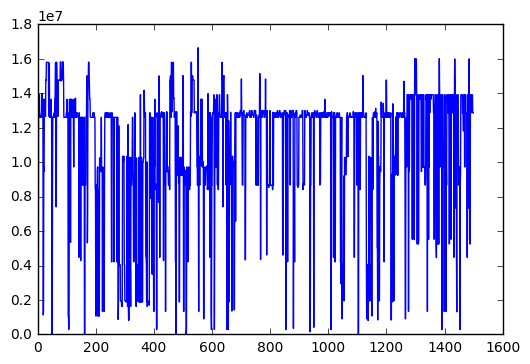

In [122]:
plt.plot(int_rep[500:2000])

In [123]:
unique_states,indxs,inv_indx,counts = np.unique(int_rep,return_index=True,return_inverse = True,return_counts=True)

In [124]:
byte_vector = [2**i for i in range(len(sorted_keys))]

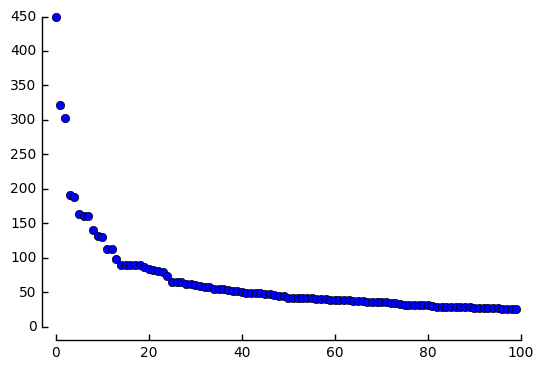

In [129]:
sort_idx = np.argsort(counts)[::-1]
#only a few motor states are common
plt.plot(counts[sort_idx][:100],'o',clip_on = False)
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [138]:
common_state_vector = unique_states[sort_idx]
common_states_bin = ['%024d'%np.int(np.binary_repr(x)) for x in common_state_vector]
common_states_bin = np.array([np.array(list(x)).astype('int') for x in common_states_bin])

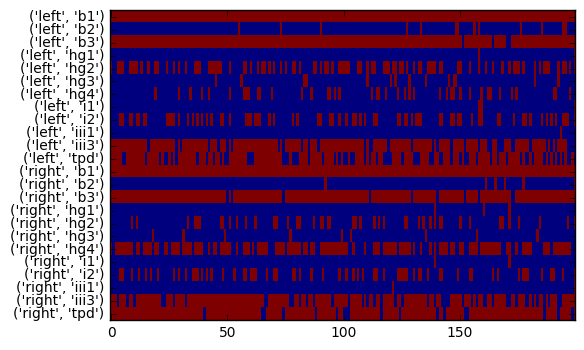

In [145]:
plt.imshow(common_states_bin.T[::-1,:200],aspect = 'auto',interpolation = 'nearest')
lbs = plt.gca().set_yticks(range(0,24))
lbs = plt.gca().set_yticklabels(sorted_keys)